In [8]:
import json
import pandas as pd

In [2]:
table = {'sha256': list(), 'label': list(), 'entropy': list(), 'name': list(), 'size': list()}

for n in range(6):
    num = 0
    with open(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/train_features_{n}.jsonl') as file:
        while True:
            line = file.readline()
            if not line:
                break
            line_json = json.loads(line)
            table['sha256'].append(line_json['sha256'])    
            table['label'].append(line_json['label'])
            entropy, name, size = list(), list(), list()
            for sec in line_json['section']['sections']:
                entropy.append(round(sec['entropy'], 4))
                name.append(sec['name'])
                size.append(sec['size'])
            table['entropy'].append(entropy)
            table['name'].append(name)
            table['size'].append(entropy)
            num += 1
            if num % 1000 == 0:
                print(f'\rjsonl{n} : {num}', end='')        
        print(f'\rjsonl{n} : {num}')
    
train_df = pd.DataFrame(table)
train_df['cond1'] = train_df['size'].map(lambda x: 1 if sum(map(lambda y: 0 if y else 1, x)) else 0)
train_df['cond2'] = train_df['entropy'].map(lambda x: 1 if sum(map(lambda y: 0 if 0 < y < 7 else 1, x)) else 0)
train_df['cond_1or2'] = train_df['cond1'] | train_df['cond2']

train_df.to_csv(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/train_main_features_NJ.csv')

train_df

jsonl0 : 50000
jsonl1 : 170000
jsonl2 : 170000
jsonl3 : 170000
jsonl4 : 170000
jsonl5 : 170000


,sha256,label,entropy,name,size,cond1,cond2,cond_1or2
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,0,"[6.5322, 5.4331, 1.7424, -0.0, 5.0209]","[.text, .rdata, .data, .rsro, .rsrc]","[6.5322, 5.4331, 1.7424, -0.0, 5.0209]",1,1,1
1,d4206650743b3d519106dea10a38a55c30467c3d9f7875...,0,"[-0.0, 7.9237, 4.1467]","[UPX0, UPX1, .rsrc]","[-0.0, 7.9237, 4.1467]",1,1,1
2,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,0,"[6.8229, 6.2047, 3.6912]","[.text, .data, .rsrc]","[6.8229, 6.2047, 3.6912]",0,0,0
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,0,"[6.5993, 4.1286, -0.0, 4.6462, -0.0, 2.0491, -...","[CODE, DATA, BSS, .idata, .tls, .rdata, .reloc...","[6.5993, 4.1286, -0.0, 4.6462, -0.0, 2.0491, -...",1,1,1
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,0,"[6.5914, 4.0991, 7.9861]","[.text, .data, .rsrc]","[6.5914, 4.0991, 7.9861]",0,1,1
...,...,...,...,...,...,...,...,...
899995,fffe4814bd4e333d91f710df8ec2e56e31ff8afb13099b...,1,"[6.2354, 6.5561, -0.0, 5.077, 3.5596, 4.8273]","[.text, .data, .bss, .idata, .rsrc, .reloc]","[6.2354, 6.5561, -0.0, 5.077, 3.5596, 4.8273]",1,1,1
899996,fffe8eafb43ce2181cb124413f2d54bf12ab99815922ab...,1,"[4.7255, -0.0, 4.2237]","[.text, .data, .rsrc]","[4.7255, -0.0, 4.2237]",1,1,1
899997,ffff49525f240d58e198ca4e08ea1a7fe1632bf0411950...,-1,"[5.8094, -0.0, 4.0115]","[.text, .data, .rsrc]","[5.8094, -0.0, 4.0115]",1,1,1
899998,ffff9a65324d628e3ef0a830f5460fda18acaa02279158...,1,"[5.6962, -0.0, 4.7162]","[.text, .data, .rsrc]","[5.6962, -0.0, 4.7162]",1,1,1


In [3]:
table = {'sha256': list(), 'label': list(), 'entropy': list(), 'name': list(), 'size': list()}

num = 0
with open(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/test_features.jsonl') as file:
    while True:
        line = file.readline()
        if not line:
            break
        line_json = json.loads(line)
        table['sha256'].append(line_json['sha256'])    
        table['label'].append(line_json['label'])
        entropy, name, size = list(), list(), list()
        for sec in line_json['section']['sections']:
            entropy.append(round(sec['entropy'], 4))
            name.append(sec['name'])
            size.append(sec['size'])
        table['entropy'].append(entropy)
        table['name'].append(name)
        table['size'].append(entropy)
        num += 1
        if num % 1000 == 0:
            print(f'\rjsonl_test : {num}', end='') 
    print(f'\rjsonl_test : {num}')

test_df = pd.DataFrame(table)
test_df['cond1'] = test_df['size'].map(lambda x: 1 if sum(map(lambda y: 0 if y else 1, x)) else 0)
test_df['cond2'] = test_df['entropy'].map(lambda x: 1 if sum(map(lambda y: 0 if 0 < y < 7 else 1, x)) else 0)
test_df['cond_1or2'] = test_df['cond1'] | test_df['cond2']

test_df.to_csv(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/test_main_features_NJ.csv')

test_df

jsonl_test : 200000


,sha256,label,entropy,name,size,cond1,cond2,cond_1or2
0,0001a959869f81b94c6b380f5161cdf315203227b8bcb8...,1,"[-0.0, 7.9976, 5.682]","[UPX0, UPX1, .rsrc]","[-0.0, 7.9976, 5.682]",1,1,1
1,000253d72d0b303a2af97057e86301e5121be2a8705892...,1,"[5.5602, -0.0, 5.4195]","[.text, .data, .rsrc]","[5.5602, -0.0, 5.4195]",1,1,1
2,0002aff0af07d2fb0d4bcf978248f3de9b0709e09f7e0b...,0,"[6.0813, 4.1059, 3.5021, 3.738, 4.8629, 4.1027]","[.text, .rdata, .data, .pdata, .rsrc, .reloc]","[6.0813, 4.1059, 3.5021, 3.738, 4.8629, 4.1027]",0,0,0
3,00048cd8ce4e9e981dcf2b51f7f6cac66a30c782825e06...,1,"[5.7848, 0.1623, 1.3985, 3.9147, 4.572, 2.7517]","[.text, .rdata, .data, .idata, .reloc, .edata]","[5.7848, 0.1623, 1.3985, 3.9147, 4.572, 2.7517]",0,0,0
4,0004949156b344dafaa673ebfdefb1460f167984099101...,0,"[5.2223, 3.235, 1.585]","[.text, .rsrc, .reloc]","[5.2223, 3.235, 1.585]",0,0,0
...,...,...,...,...,...,...,...,...
199995,fffe314f23cee3a68ccab272934877d3bc18ec3bd905df...,0,"[5.4277, 2.5871, 1.2075]","[.text, .rsrc, .reloc]","[5.4277, 2.5871, 1.2075]",0,0,0
199996,fffe7a1b23e04facc9ca91a93ac4a34e8b3040e023dbde...,1,"[5.8152, 0.1623, 1.3156, 3.9147, 4.572, 2.7087]","[.text, .rdata, .data, .idata, .reloc, .edata]","[5.8152, 0.1623, 1.3156, 3.9147, 4.572, 2.7087]",0,0,0
199997,fffe801f51e7ec931515aa49a3d157a9c0fbcdca8c9d80...,0,"[6.9077, 1.9473]","[.text, .reloc]","[6.9077, 1.9473]",0,0,0
199998,fffe92f9593649c4a7050302368189de45e2c1c06b04ea...,1,"[6.5723, 4.8516, 2.5752, 5.4247]","[.text, .rdata, .data, .rsrc]","[6.5723, 4.8516, 2.5752, 5.4247]",0,0,0


In [32]:
train_pivot_df = train_df.pivot_table(index='label', columns='cond_1or2', values='sha256', aggfunc='count')
train_pivot_df

cond_1or2,0,1
label,,
-1,132392,167608
0,208276,91724
1,91483,208517


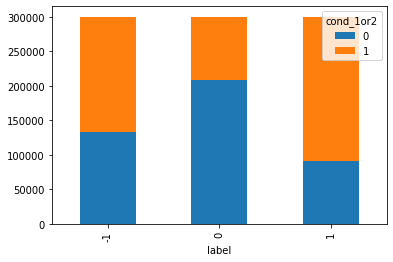

In [33]:
train_pivot_df.plot.bar(stacked=True)